In [1]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob
import os
import seaborn as sns

In [2]:
data_path = './dataFolders/FinalTracking_xypts/AngleAndRadiusIncluded/v1/'
# data = glob.glob(data_path + '**.csv')
circ_params = pd.read_csv('./dataFolders/circle_parameters.csv')

outfig = './dataFolders/Figures/DifferentRMSEThresholds/'

In [3]:
def getNameAndTrial(path):
    _, tail = os.path.split(path)
    name = tail[:-4]
    name

    trial = name.split('_')[2]
    return(name, trial)

C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is

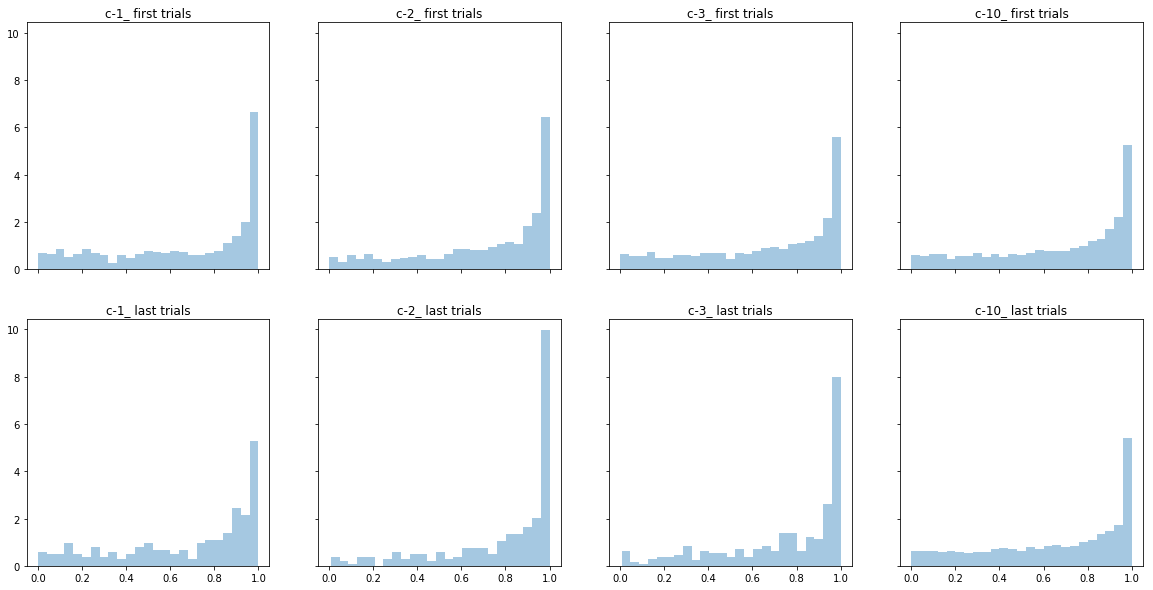

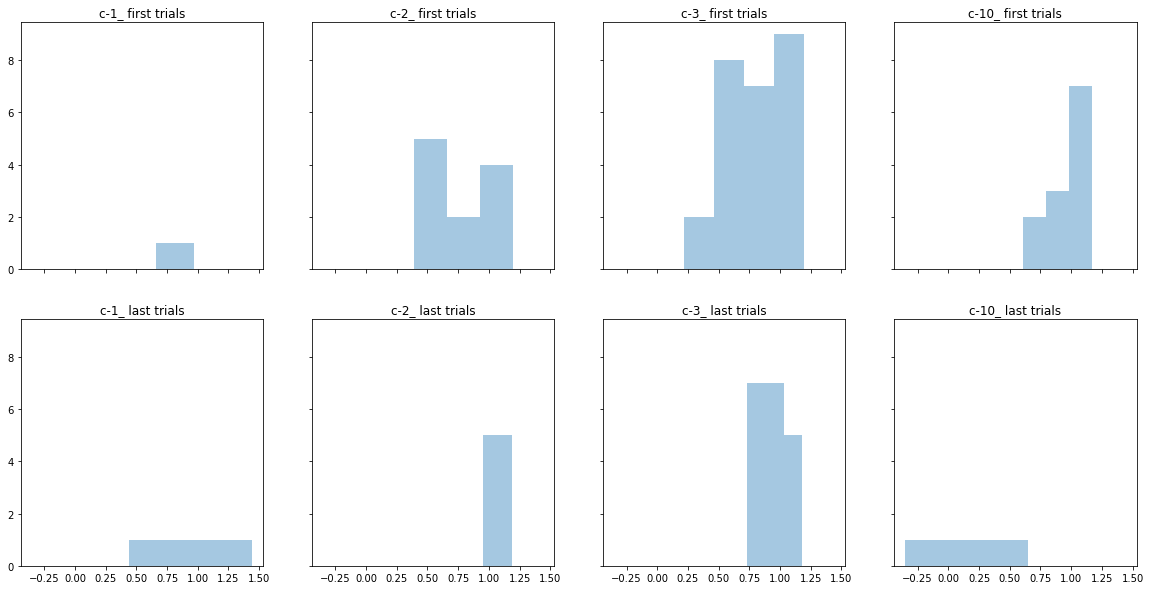

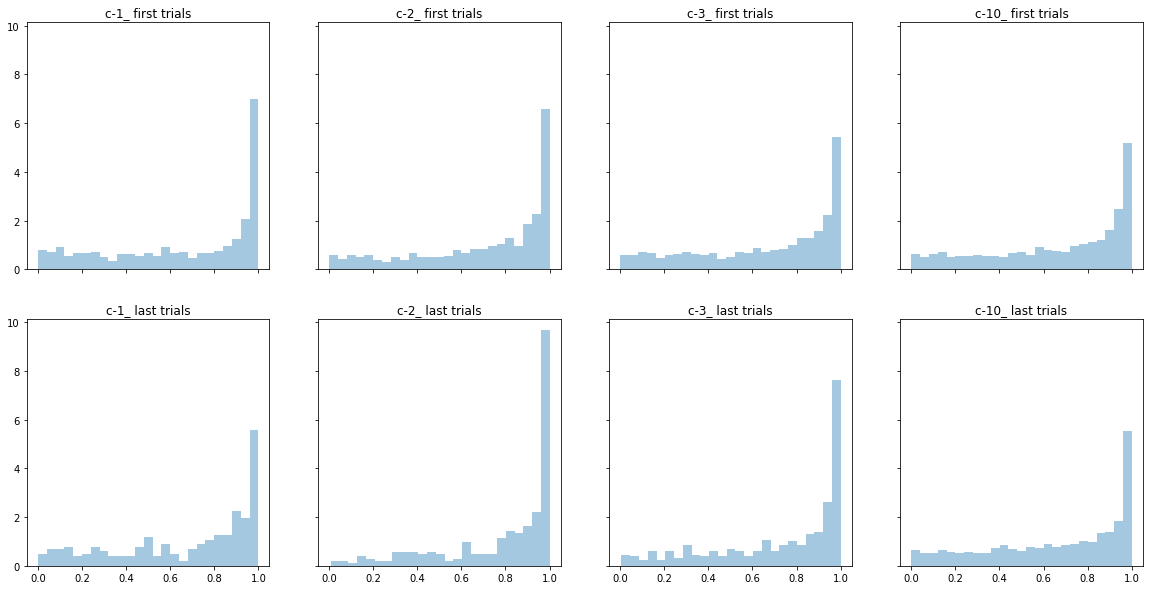

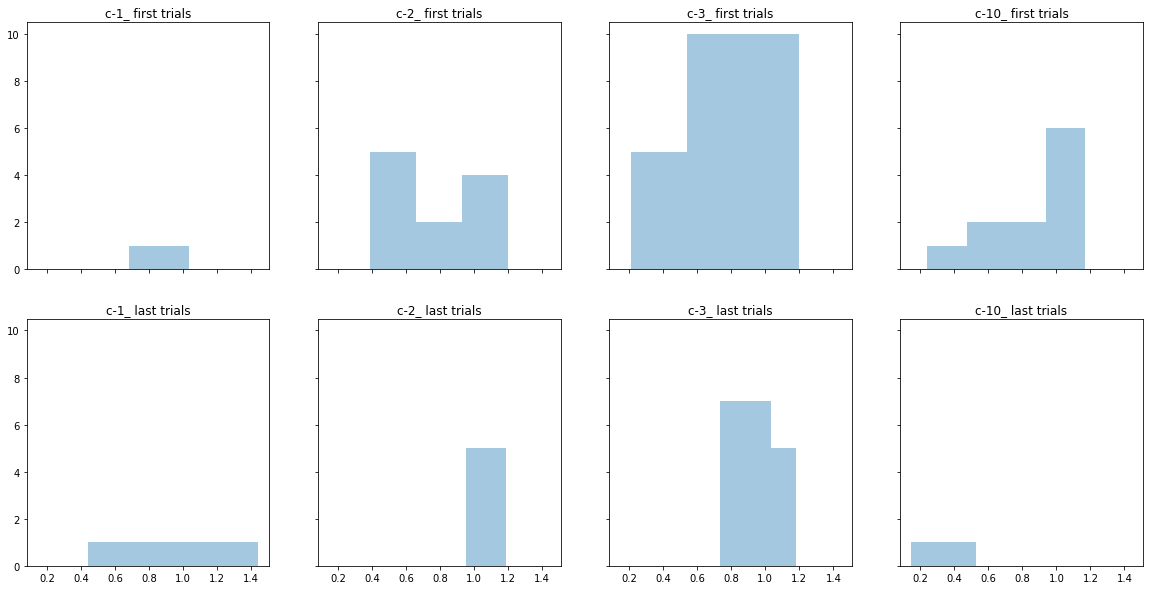

In [15]:
for cutoff in ['cutoff20', 'cutoff24']:
    
    data = glob.glob(data_path + cutoff +'/**.csv')
    
    df = pd.DataFrame([])
    for eachfile in data:
        temp = pd.read_csv(eachfile)

        name, trial = getNameAndTrial(eachfile)
        
        p1 = pd.Series(data = [name] * len(temp), name = 'name')
        p2 = pd.Series(data = [trial] * len(temp), name = 'trial')

        temp1 = pd.concat([temp, p1, p2], axis = 1)

        df = df.append(temp1)
#         print(len(df))
        
    # draw the angle distribution
    fig, ax = plt.subplots(2,4, figsize = (20,10), sharex = True, sharey = True)
    ax = ax.ravel()

    shapes = ['c-1_', 'c-2_', 'c-3_', 'c-10_']
    bins = 25

    for i, shape in enumerate(shapes):
        subset = df.loc[(df.name.str.contains(shape)) & 
                             (df.trial == 'first'), 'angle_savgol'].values
        subset = subset[~np.isnan(subset)]
        subset = np.cos(np.deg2rad(subset))
        sns.distplot(subset, ax = ax[i], bins = bins, kde = False, norm_hist = True)
        ax[i].set_title(shape + ' first trials')

        subset = df.loc[(df.name.str.contains(shape)) & 
                             (df.trial == 'last'), 'angle_savgol'].values
        subset = subset[~np.isnan(subset)]
        subset = np.cos(np.deg2rad(subset))
        sns.distplot(subset, ax = ax[i + 4], bins = bins, kde = False, norm_hist = True)
        ax[i + 4].set_title(shape + ' last trials')

#     ax[i].set_ylim([0, 0.045])
    fig.savefig(outfig + cutoff +'//angleDistributions_projection.png')

In [17]:
df.head()

,Unnamed: 0,Unnamed: 0.1,tracked_x,tracked_y,rmse,radial distance,x_gauss,y_gauss,radial distance gaussian,angle_gauss,x_savgol,y_savgol,radial distance savgol,angle_savgol,name,trial
0,0,0,0.358988,0.590489,0.000000,5.248879,-44.481833,31.293901,0.734959,59.749697,-225.560046,-134.309597,262.519337,24.657109,c-10_m11_first,first
1,1,1,NaN,NaN,582.047472,1.725391,-41.820760,62.481809,1.016029,43.013427,-117.594810,22.363160,119.702340,66.249924,c-10_m11_first,first
2,2,2,336.463392,462.251345,15.550810,3.043070,-33.471301,99.140184,1.414027,33.952812,-39.661718,135.997072,141.662470,50.654170,c-10_m11_first,first
3,3,3,336.463392,462.251345,0.000000,3.043070,-21.491605,136.806380,1.871408,28.034818,12.408996,212.260531,212.622943,30.963190,c-10_m11_first,first
4,4,4,332.823313,467.268648,6.198670,3.104387,-8.673547,170.723938,2.310056,24.661843,42.787099,256.821930,260.361747,24.963112,c-10_m11_first,first


C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is

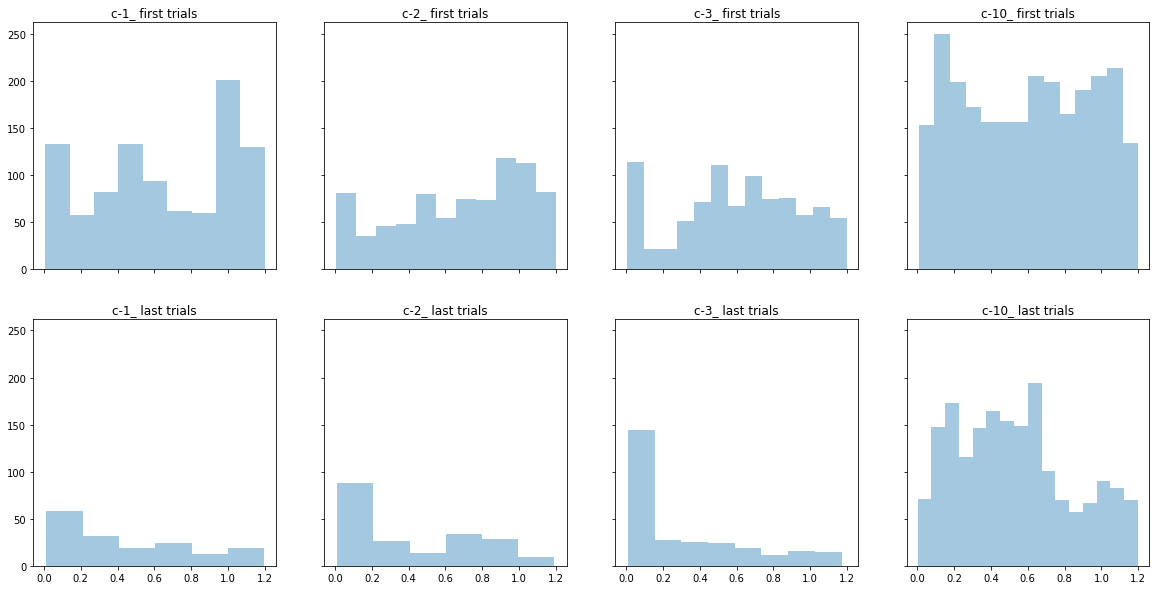

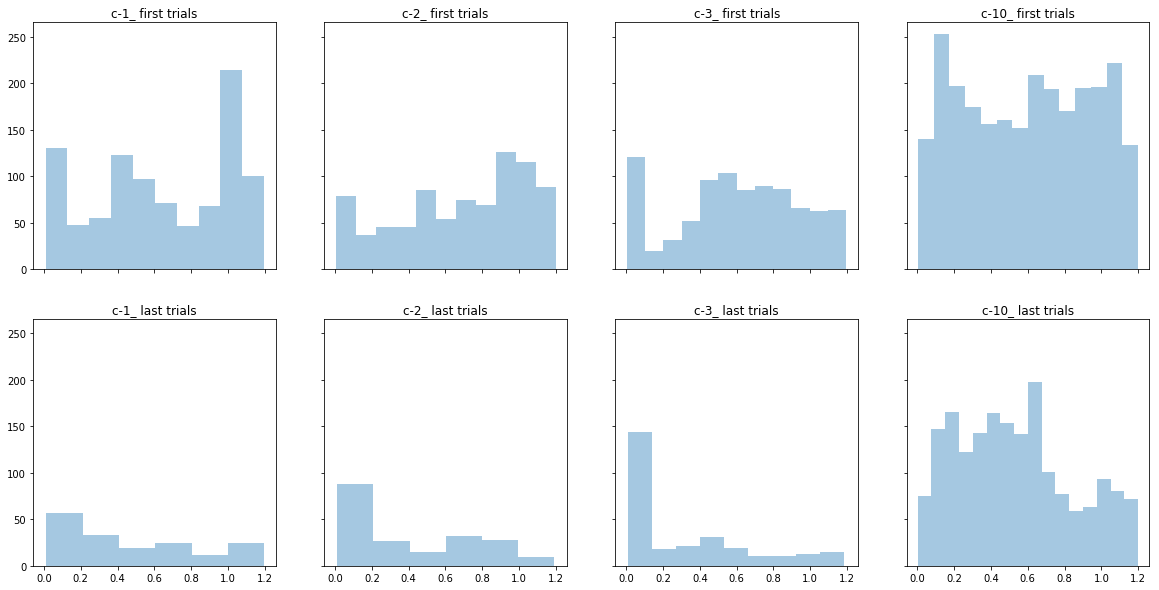

In [20]:
for cutoff in ['cutoff20', 'cutoff24']:
    
    data = glob.glob(data_path + cutoff +'/**.csv')
    
    df = pd.DataFrame([])
    for eachfile in data:
        temp = pd.read_csv(eachfile)

        name, trial = getNameAndTrial(eachfile)
        
        p1 = pd.Series(data = [name] * len(temp), name = 'name')
        p2 = pd.Series(data = [trial] * len(temp), name = 'trial')

        temp1 = pd.concat([temp, p1, p2], axis = 1)

        df = df.append(temp1)
#         print(len(df))
        
    
    fig1, ax = plt.subplots(2,4, figsize = (20,10), sharex = True, sharey = True)
    ax = ax.ravel()

    shapes = ['c-1_', 'c-2_', 'c-3_', 'c-10_']
    bins = 25

    for i, shape in enumerate(shapes):
        subset = df.loc[(df.name.str.contains(shape)) & 
                             (df.trial == 'first'), 'radial distance savgol'].values
        subset = subset[~np.isnan(subset)]
        subset = subset[subset <= 1.2]
        sns.distplot(subset, ax = ax[i], kde = False)
        ax[i].set_title(shape + ' first trials')

        subset = df.loc[(df.name.str.contains(shape)) & 
                             (df.trial == 'last'), 'radial distance savgol'].values
        subset = subset[~np.isnan(subset)]
        subset = subset[subset <= 1.2]
        sns.distplot(subset, ax = ax[i + 4], kde = False)
        ax[i + 4].set_title(shape + ' last trials')

    # ax[i].set_ylim([0, 4])
    fig1.savefig(outfig + cutoff + '//RadiusDistributions.png')

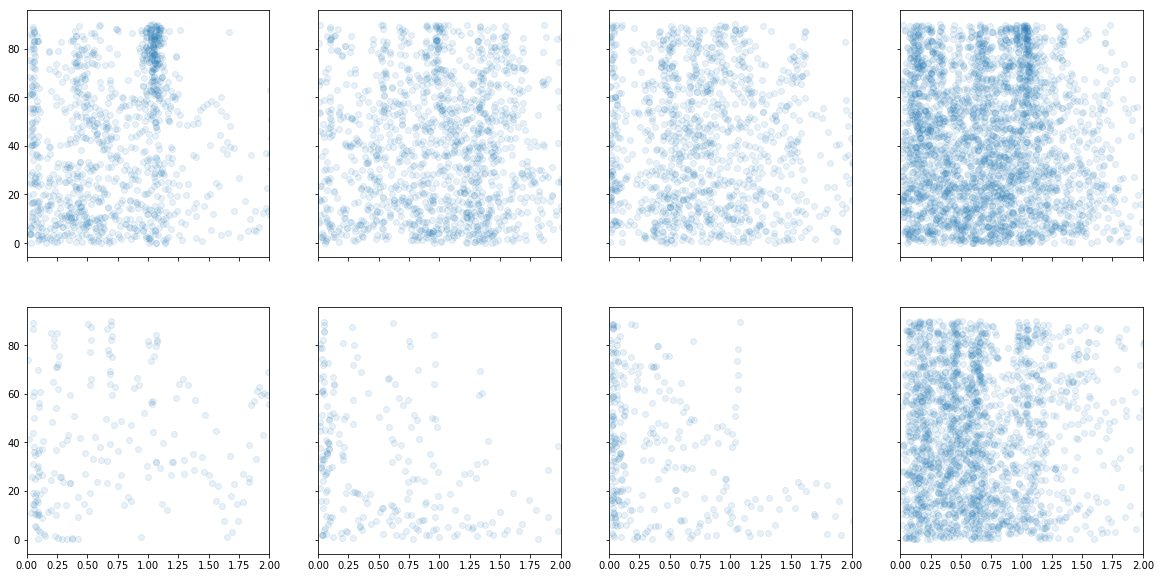

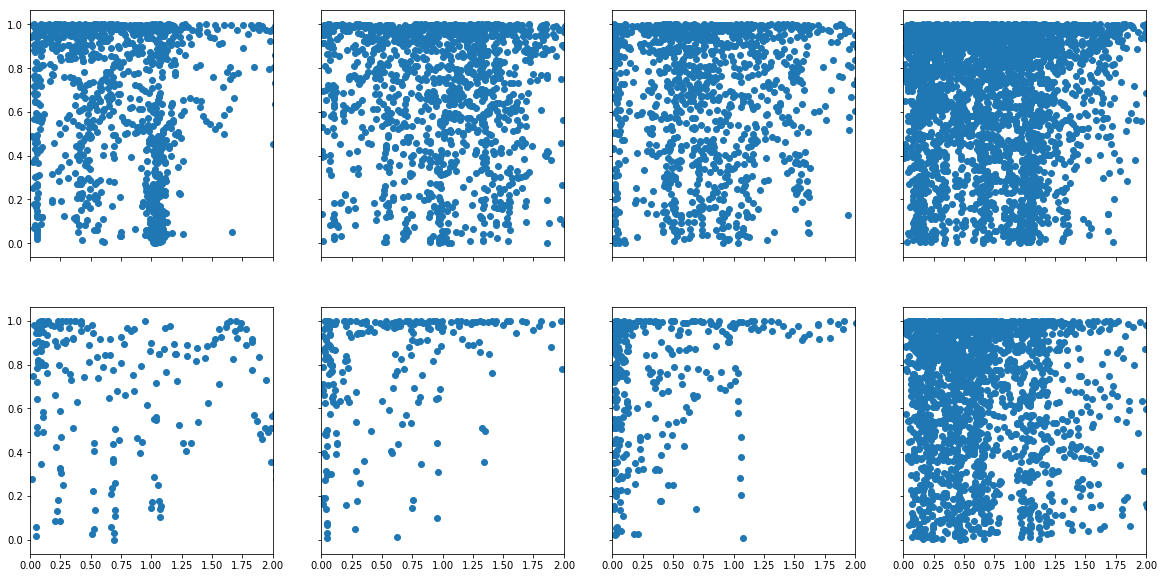

In [52]:
for cutoff in ['cutoff20', 'cutoff24'][0:1]:
    
    data = glob.glob(data_path + cutoff +'/**.csv')
    
    df = pd.DataFrame([])
    for eachfile in data:
        temp = pd.read_csv(eachfile)

        name, trial = getNameAndTrial(eachfile)
        
        p1 = pd.Series(data = [name] * len(temp), name = 'name')
        p2 = pd.Series(data = [trial] * len(temp), name = 'trial')

        temp1 = pd.concat([temp, p1, p2], axis = 1)

        df = df.append(temp1)
#         print(len(df))
        
    fig1, ax = plt.subplots(2,4, figsize = (20,10), sharex = True, sharey = True)
    ax = ax.ravel()
    
    fig2, ax2 = plt.subplots(2,4, figsize = (20,10), sharex = True, sharey = True)
    ax2 = ax2.ravel()

    shapes = ['c-1_', 'c-2_', 'c-3_', 'c-10_']

    for i, shape in enumerate(shapes):
        angle = df.loc[(df.name.str.contains(shape)) & 
                             (df.trial == 'first'), 'angle_savgol'].values
        projection = np.cos(np.deg2rad(angle))
        radial_distance = df.loc[(df.name.str.contains(shape)) & 
                             (df.trial == 'first'), 'radial distance savgol'].values
        
        ax[i].scatter(radial_distance, angle, alpha=0.1)
        ax[i].set_xlim([0, 2])
        
        ax2[i].scatter(radial_distance, projection)
        ax2[i].set_xlim([0, 2])
        
        
        angle = df.loc[(df.name.str.contains(shape)) & 
                             (df.trial == 'last'), 'angle_savgol'].values
        projection = np.cos(np.deg2rad(angle))
        radial_distance = df.loc[(df.name.str.contains(shape)) & 
                             (df.trial == 'last'), 'radial distance savgol'].values
        
        ax[i + 4].scatter(radial_distance, angle, alpha = 0.1)
        ax[i + 4].set_xlim([0, 2])

        ax2[i + 4].scatter(radial_distance, projection)
        ax2[i + 4].set_xlim([0, 2])

In [43]:
cutoff = 'cutoff20'
data = glob.glob(data_path + cutoff +'/**.csv')

df_20 = pd.DataFrame([])
for eachfile in data:
    temp = pd.read_csv(eachfile)

    name, trial = getNameAndTrial(eachfile)

    p1 = pd.Series(data = [name] * len(temp), name = 'name')
    p2 = pd.Series(data = [trial] * len(temp), name = 'trial')

    temp1 = pd.concat([temp, p1, p2], axis = 1)

    df_20  = df.append(temp1)

In [44]:
cutoff = 'cutoff24'
data = glob.glob(data_path + cutoff +'/**.csv')

df_24 = pd.DataFrame([])
for eachfile in data:
    temp = pd.read_csv(eachfile)

    name, trial = getNameAndTrial(eachfile)

    p1 = pd.Series(data = [name] * len(temp), name = 'name')
    p2 = pd.Series(data = [trial] * len(temp), name = 'trial')

    temp1 = pd.concat([temp, p1, p2], axis = 1)

    df_24  = df.append(temp1)

In [45]:
df_20.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'tracked_x', 'tracked_y', 'rmse',
       'radial distance', 'x_gauss', 'y_gauss', 'radial distance gaussian',
       'angle_gauss', 'x_savgol', 'y_savgol', 'radial distance savgol',
       'angle_savgol', 'name', 'trial'],
      dtype='object')

(array([  1.,   1.,   1.,   9., 125.,   2.,   4.,   1.,   0.,   1.]),
 array([-15.16043623, -11.74459195,  -8.32874767,  -4.91290339,
         -1.49705911,   1.91878517,   5.33462945,   8.75047373,
         12.16631801,  15.58216229,  18.99800657]),
 <a list of 10 Patch objects>)

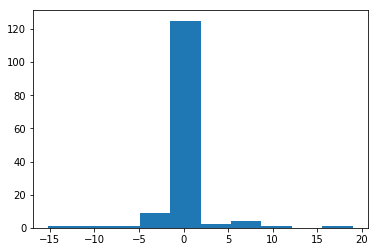

In [47]:
angle_20 = df_20.loc[:,'angle_savgol'].values
angle_24 = df_24.loc[:,'angle_savgol'].values

diff = angle_20 - angle_24
plt.hist(diff)

(array([  1.,   1.,   1.,   3., 113.,   7.,   4.,   4.,   5.,   6.]),
 array([-0.0104816 , -0.0081864 , -0.00589121, -0.00359601, -0.00130082,
         0.00099438,  0.00328957,  0.00558477,  0.00787996,  0.01017516,
         0.01247036]),
 <a list of 10 Patch objects>)

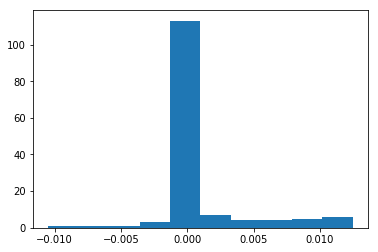

In [49]:
r_20 = df_20.loc[:,'radial distance savgol'].values
r_24 = df_24.loc[:,'radial distance savgol'].values

diff = r_20 - r_24
plt.hist(diff)

In [20]:
np.any(df.angle.notnull())

True

C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


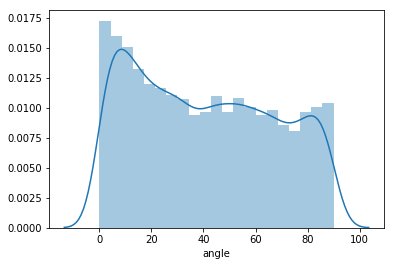

In [21]:
import seaborn as sns
sns.distplot(df[df.angle.notnull()].angle)

C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is

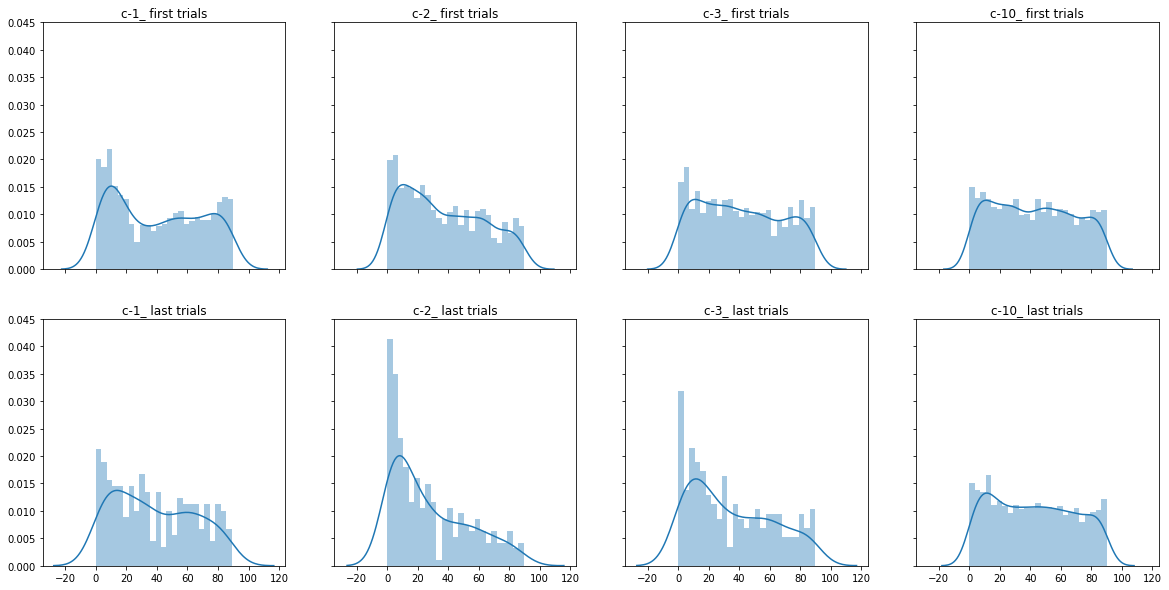

In [26]:
fig, ax = plt.subplots(2,4, figsize = (20,10), sharex = True, sharey = True)
ax = ax.ravel()

shapes = ['c-1_', 'c-2_', 'c-3_', 'c-10_']
bins = 25

for i, shape in enumerate(shapes):
    subset = df.loc[(df.name.str.contains(shape)) & 
                         (df.trial == 'first'), 'angle'].values
    subset = subset[~np.isnan(subset)]
    sns.distplot(subset, ax = ax[i], bins = bins)
    ax[i].set_title(shape + ' first trials')
    
    subset = df.loc[(df.name.str.contains(shape)) & 
                         (df.trial == 'last'), 'angle'].values
    subset = subset[~np.isnan(subset)]
    sns.distplot(subset, ax = ax[i + 4], bins = bins)
    ax[i + 4].set_title(shape + ' last trials')
    
ax[i].set_ylim([0, 0.045])
fig.savefig(outfig + '//angleDistributions.png')

In [27]:
kstest_matrix_first = pd.DataFrame(data = None, columns = shapes, index = shapes)

In [29]:
from scipy import stats

combinations = [(x,y) for x in shapes for y in shapes]
for x,y in combinations:
    
    subset1 = df.loc[(df.name.str.contains(x)) & 
                         (df.trial == 'first'), 'angle'].values    
    subset1 = subset1[~np.isnan(subset1)]
    
    subset2 = df.loc[(df.name.str.contains(y)) & 
                         (df.trial == 'first'), 'angle'].values
    subset2 = subset2[~np.isnan(subset2)]
    
    D, pvalue = stats.ks_2samp(subset1, subset2)
    kstest_matrix_first.loc[x,y] = pvalue

In [30]:
kstest_matrix_first

,c-1_,c-2_,c-3_,c-10_
c-1_,1,4.46671e-05,0.000782713,8.52532e-07
c-2_,4.46671e-05,1,5.73846e-05,5.34033e-09
c-3_,0.000782713,5.73846e-05,1,0.22553
c-10_,8.52532e-07,5.34033e-09,0.22553,1


In [32]:
kstest_matrix_last = pd.DataFrame(data = None, columns = shapes, index = shapes)

combinations = [(x,y) for x in shapes for y in shapes]
for x,y in combinations:
    
    subset1 = df.loc[(df.name.str.contains(x)) & 
                         (df.trial == 'last'), 'angle'].values    
    subset1 = subset1[~np.isnan(subset1)]
    
    subset2 = df.loc[(df.name.str.contains(y)) & 
                         (df.trial == 'last'), 'angle'].values
    subset2 = subset2[~np.isnan(subset2)]
    
    D, pvalue = stats.ks_2samp(subset1, subset2)
    kstest_matrix_last.loc[x,y] = pvalue
kstest_matrix_last

,c-1_,c-2_,c-3_,c-10_
c-1_,1,2.63819e-05,0.224494,0.0558481
c-2_,2.63819e-05,1,0.00805771,6.1321e-14
c-3_,0.224494,0.00805771,1,2.6985e-05
c-10_,0.0558481,6.1321e-14,2.6985e-05,1


In [33]:
kstest_matrix_first2last = pd.DataFrame(data = None, columns = ['first-last'], index = shapes)

for x in shapes:
    
    subset1 = df.loc[(df.name.str.contains(x)) & 
                         (df.trial == 'first'), 'angle'].values    
    subset1 = subset1[~np.isnan(subset1)]
    
    subset2 = df.loc[(df.name.str.contains(x)) & 
                         (df.trial == 'last'), 'angle'].values
    subset2 = subset2[~np.isnan(subset2)]
    
    D, pvalue = stats.ks_2samp(subset1, subset2)
    kstest_matrix_first2last.loc[x,'first-last'] = pvalue
kstest_matrix_first2last

,first-last
c-1_,0.192725
c-2_,7.1152e-07
c-3_,0.000301517
c-10_,0.493782


In [36]:
shapes

['c-1_', 'c-2_', 'c-3_', 'c-10_']

In [37]:
subset1 = df.loc[(df.name.str.contains(shapes[0])) & 
                     (df.trial == 'first'), 'angle'].values    
subset1 = subset1[~np.isnan(subset1)]

subset2 = df.loc[(df.name.str.contains(shapes[0])) & 
                     (df.trial == 'last'), 'angle'].values    
subset2 = subset2[~np.isnan(subset2)]
    

subset3 = df.loc[(df.name.str.contains(shapes[1])) & 
                     (df.trial == 'first'), 'angle'].values    
subset3 = subset3[~np.isnan(subset3)]

subset4 = df.loc[(df.name.str.contains(shapes[1])) & 
                     (df.trial == 'last'), 'angle'].values    
subset4 = subset4[~np.isnan(subset4)]        
    

subset5 = df.loc[(df.name.str.contains(shapes[2])) & 
                     (df.trial == 'first'), 'angle'].values    
subset5 = subset5[~np.isnan(subset5)]

subset6 = df.loc[(df.name.str.contains(shapes[2])) & 
                     (df.trial == 'last'), 'angle'].values    
subset6 = subset6[~np.isnan(subset6)]

subset7 = df.loc[(df.name.str.contains(shapes[3])) & 
                     (df.trial == 'first'), 'angle'].values    
subset7 = subset7[~np.isnan(subset7)]

subset8 = df.loc[(df.name.str.contains(shapes[3])) & 
                     (df.trial == 'last'), 'angle'].values    
subset8 = subset8[~np.isnan(subset8)]
    
stats.anderson_ksamp([subset1, subset2, subset3, subset4, subset5, subset6, subset7, subset8])

C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:1680: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")


Anderson_ksampResult(statistic=33.20414428080657, critical_values=array([0.5673987 , 1.33191969, 1.84954563, 2.33842404, 2.95807984]), significance_level=2.7970063000361447e-56)

In [39]:
df.columns

Index(['Unnamed: 0', 'cent_x', 'cent_y', 'interpol_x', 'interpol_y',
       'radius_interpol', 'x_gauss', 'y_gauss', 'r_gauss', 'angle', 'name',
       'trial'],
      dtype='object')

C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is

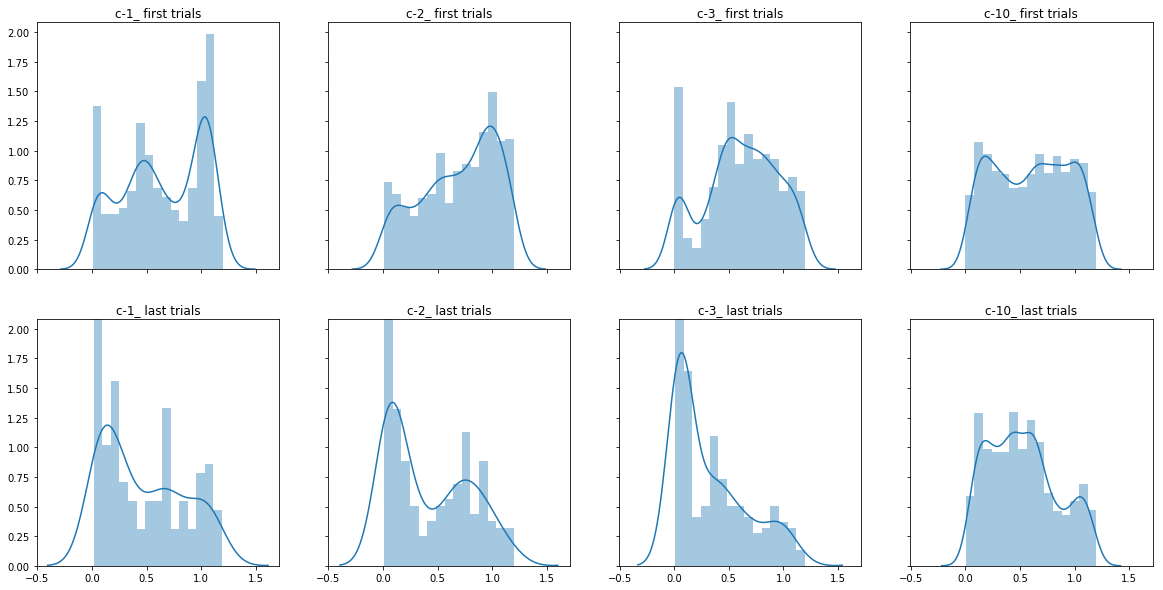

In [53]:
fig, ax = plt.subplots(2,4, figsize = (20,10), sharex = True, sharey = True)
ax = ax.ravel()

# shapes = ['c-1_', 'c-2_', 'c-3_', 'c-10_']
bins = 15

for i, shape in enumerate(shapes):
    subset = df.loc[(df.name.str.contains(shape)) & 
                         (df.trial == 'first'), 'r_gauss'].values
    subset = subset[~np.isnan(subset)]
    subset = subset[subset <= 1.2]
    sns.distplot(subset, ax = ax[i], bins = bins)
    ax[i].set_title(shape + ' first trials')
    
    subset = df.loc[(df.name.str.contains(shape)) & 
                         (df.trial == 'last'), 'r_gauss'].values
    subset = subset[~np.isnan(subset)]
    subset = subset[subset <= 1.2]
    sns.distplot(subset, ax = ax[i + 4], bins = bins)
    ax[i + 4].set_title(shape + ' last trials')
    
# ax[i].set_ylim([0, 4])
fig.savefig(outfig + '//RadiusDistributions.png')

In [ ]:
plt.plot(cent_x)
plt.plot(x_gauss)

a = plt.axes([.5, .2, .3, .3])
plt.plot(cent_x[500:600])
plt.plot(x_gauss[500:600])
plt.show()

plt.plot(cent_y)
plt.plot(y_gauss)

a = plt.axes([.4, .65, .2, .2])
plt.plot(cent_y[400:500])
plt.plot(y_gauss[400:500])
plt.show()

In [ ]:
plt.plot(cent_x, cent_y)
plt.plot(x_gauss, y_gauss)

In [ ]:
r = np.linalg.norm([cent_x, cent_y], axis = 0)
r_gauss = np.linalg.norm([x_gauss, y_gauss], axis = 0)

plt.plot(r/circ_r)
plt.plot(r_gauss/circ_r)

In [ ]:
u_x, u_y = Unitvector(x_gauss, y_gauss)

# plt.style.use('default')
strt=300
stp=320
x = x_gauss[strt:stp]
y = y_gauss[strt:stp]
x_end = u_x[strt: stp]
y_end = u_y[strt:stp]
plt.plot(x,y, 'o-.')
plt.plot(x[0], y[0], 'o' ,color = 'k')
for x0, y0, x_dash, y_dash in zip(x, y, x_end, y_end):
    plt.arrow(x0, y0, x_dash, y_dash)

In [ ]:
# test_loc = [3,0]
# test_tang = [1,1]
# getAngle(test_loc, test_tang)

In [ ]:
angle = []
for x0, y0, x, y in zip(x_gauss, y_gauss, u_x, u_y):
    loc = [x0, y0]
    tangent = [x, y]
    a = getAngle(loc, tangent)
    angle.append(a)

angle = np.absolute(angle)
for i,a in enumerate(angle):
    if a > 90:
        a = 180 - a
        angle[i] = a
    
# working_angle = np.absolute(angle)
# np.place(working_angle, working_angle>90, 180-working_angle)
# working_angle = [ 180 - angle for angle in working_angle if angle > 90 ]

In [ ]:
fig = plt.subplots(figsize = (5,5))
plt.scatter(x_gauss, y_gauss, s=7 , c = angle, cmap = plt.cm.jet)
c1 = plt.Circle((0, 0), circ_r, color='grey', alpha=0.3, edgecolor='none')
ax = plt.gca()
ax.add_artist(c1)
ax.set_aspect('equal', adjustable = 'datalim')
cbar = plt.colorbar()

In [ ]:
fig = plt.subplots(figsize = (5,5))
t0 = np.arange(len(r_gauss))*1/100
plt.scatter(t0, r_gauss/circ_r, s = 10,
            c = angle, cmap = plt.cm.jet)
cbar = plt.colorbar()

In [ ]:
import seaborn as sns

angle = np.asarray(angle)
subset = angle[~np.isnan(angle)]
sns.distplot(np.absolute(subset))

In [ ]:
trajectory = np.asarray([x_gauss, y_gauss])
m = np.gradient(trajectory, axis = 1)
m_atx = m[1]/m[0]

In [ ]:
tangent_x = x_gauss+1
tangent_y = m_atx + y_gauss

u_x = []
u_y = []

from sklearn import preprocessing

for x,y,x0,y0 in zip(tangent_x, tangent_y, x_gauss, y_gauss):
#     print(x, y)
    if np.any(np.isnan([x, y])) or np.any(np.isinf([x, y])):
#         print('caught it')
        unit_x = np.nan
        unit_y = np.nan
    else:
        vector = np.asarray([x-x0, y-y0]).reshape(1,-1)
        [unit_x, unit_y] = preprocessing.normalize(vector, norm = 'l2')[0]
    u_x.append(unit_x)
    u_y.append(unit_y)

In [ ]:
# tangent_x = x_gauss+1
# tangent_y = m_atx + y_gauss

# # tangent = np.vstack((tangent_x, tangent_y))

# u_x = []
# u_y = []
# for x, y, y0 in zip(tangent_x, m_atx, y_gauss):
#     if x == np.nan or y == np.nan:
#         unit_x = np.nan
#         unit_y = np.nan
#     else:
#         norm = np.linalg.norm([1, y], axis = 0)
#         unit_x = x/norm
#         unit_y = y/norm
#     u_x.append(unit_x)
#     u_y.append(unit_y)